## ASSIGNMENT 2 - VIP

**Group 07 - The Parallelepipeds**


##### Filter images and detect edges - implement, perform & evaluate

**WORK FLOW**

**1) Get image**



    For each sigma value:

**2) Compute/apply Gaussian filtering**
Compare images across sigma values and explain in detail what can be seen

**3) Compute gradient magnitude**
corresponds to first derivative of the Gaussian - G(x), G(y)
Get images for ech sigma and explain in detail what can be seen and how the results differ

**4) Compute Laplacian-Gaussian filtering**
Corresponds to the second derivative of the Gausian. 
Compare images across sigmas and explain in detail what can be seen and how the results differ

**5) Apply Canny (or similar) edge detection**



*Describe the parameter values and their impact on the result. Select what you think is a set of good parameter values, apply, show and decribe the result*

In [23]:
#packages
import numpy as np 
import cv2
import  matplotlib.pyplot as plt
#from PIL import Image, ImageFilter

sigma = [1.0,2.0,4.0,8.0]
#kernel = 3x3

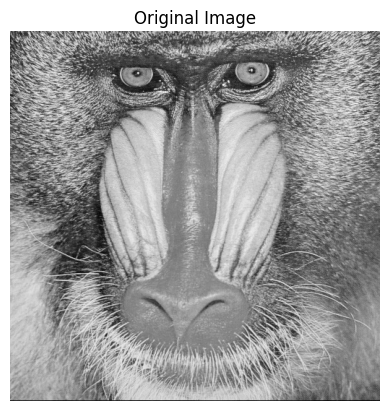

In [2]:
#get image
img = cv2.imread('mandrill.jpg', cv2.IMREAD_GRAYSCALE)  #includes greyscaling

plt.imshow(img, cmap='gray')  
plt.title('Original Image')
plt.axis('off')               
plt.show()

The Gaussian Function

$$ G(x, y) = \frac{1}{2\pi\sigma^2} \exp\left( -\frac{x^2 + y^2}{2\sigma^2} \right) $$




The Gaussian filtering runs over a neighbourhood and filters, computes a weighted average of pixel neighbours --> thereby "smoothing" or blurring the image. Or smoothing out/reducing the noice.  

Ergo, convolution with a Gaussian kernel returns a new pixel that is a weighted average of its neighbours. 

The function is used to compute kernel values. 'x' and 'y' are coordinates inrelation to the center of the kernel grid - in accordance to the Gaussian distribution, i.e. the center is 0 (and weighs the most)

The kernel grid is thus: 
(-1,-1) (-1,0) (-1,-1)
(0,-1), (0,0), (0,1)
(1,-1), (1,0), (1,1)

And then we just put these x and y oordinates/values into the formula and compute kernel values. Easy peasy lemon squeexy  ... :)

In [ ]:
## "by hand"

# 0) transform image to float
img =  img.astype(np.float32) / 255.0  # /255..0 to normalize pixel values to 0-1 values bc Gaussian kernel values sum to 1

# 1) Build kernel
def gaus_kernel(kernel_size, sigma):
    kernel = np.zeros((kernel_size, kernel_size),dtype=np.float32)
    coord = [-1,0,1]

    #compute Gaussian kernel values/weights
    for i,x in enumerate(coord):
        for j,y in enumerate(coord):
            kernel[i,j] = (1/(2*np.pi*sigma**2)*np.exp(-(x**2 + y**2)/(2*sigma**2)))

    return kernel


gaus_kernel(3,5)

# 2) Apply kernel, i.e convolve
def convolve(img, kernel, kernel_size):
    height = img.shape[0]
    width = img.shape[1]
    k_h = kernel.shape[0]
    k_w = kernel.shape[1]
    values = np.zeros_like(img)  

     ## app. "padding" is needed - otherwise the kernel cannot handle the edges of the image duh
    #pad_height = kernel_size // 2
    pad_width = kernel_size // 2

    padded_img = np.pad(img, pad_width, mode='edge') #copy nearest values and add as "edge"

    #for each pixel - 
    for i in range(height): #for each row
        for j in range(width): #for each column

            neighbourhood = padded_img[i:i+k_h, j:j+k_w] #get image neighboorhood (same 3x3 size as kernel)
            values[i,j] = np.sum(neighbourhood * kernel) 
    return values


my_Gaussian = convolve(img, gaus_kernel(3,1),3)

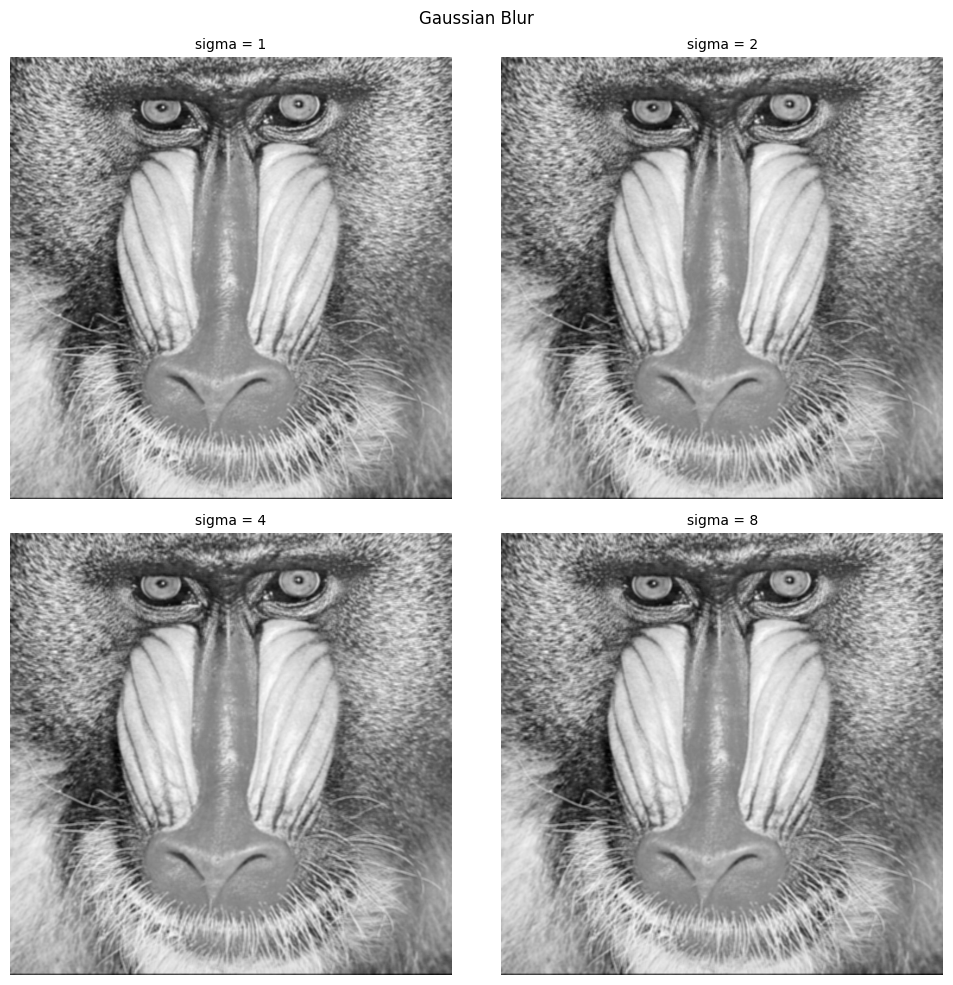

In [5]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()

for i,s in enumerate(sigma):
    my_Gaussian = convolve(img, gaus_kernel(3,s),3)
    
    ax[i].imshow(my_Gaussian, cmap='gray')  
    #ax[sigma.index(i)].set_title(f'Gaussian Blurred Image (sigma={i})')
    ax[i].axis('off')
    ax[i].set_title(f'sigma = {s}', fontsize=10)
fig.suptitle(f'Gaussian Blur')
plt.tight_layout()
plt.show()

#### **comments to the blurring**
After applying the Gaussian filtering, the image is smoothed (or blurred) increasingly as the sigma value increases. However the smoothing is very very fait. 

We chose a kernel size 3x3, which is a quite small neighbourhood to average over. Hence the blurring effect is quite subtle, despite the increasing sigma values which affect the magnitude of the blur.  

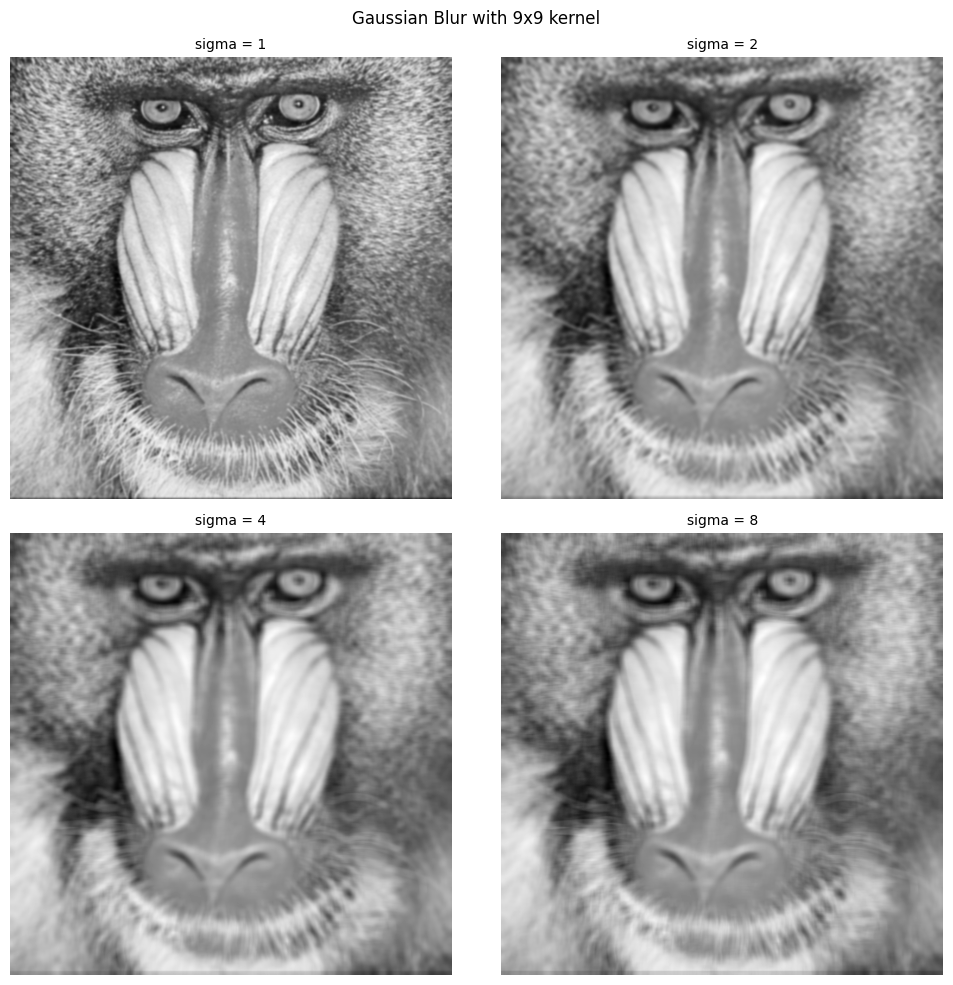

In [6]:
# Bluring - Apply Gaussian filter 
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax = ax.flatten()

for i,s in enumerate(sigma):
    gaus = cv2.GaussianBlur(img,(9,9), s)
    
    ax[i].imshow(gaus, cmap='gray')  
    #ax[sigma.index(i)].set_title(f'Gaussian Blurred Image (sigma={i})')
    ax[i].axis('off')
    ax[i].set_title(f'sigma = {s}', fontsize=10)
fig.suptitle(f'Gaussian Blur with 9x9 kernel')
plt.tight_layout()
plt.show()


#### **comments to the blurring**
If we increase the kernel size  to 9x9 as below, we see a much more intense smoothing effect and a more clear representation of the relationship between blur and the sigma value - i.e. that the blurring increases as sigma value increases. Which makes sense, since the sigma value determines how wide the Gaussian distrubtion  or in our case, the kernel weights.

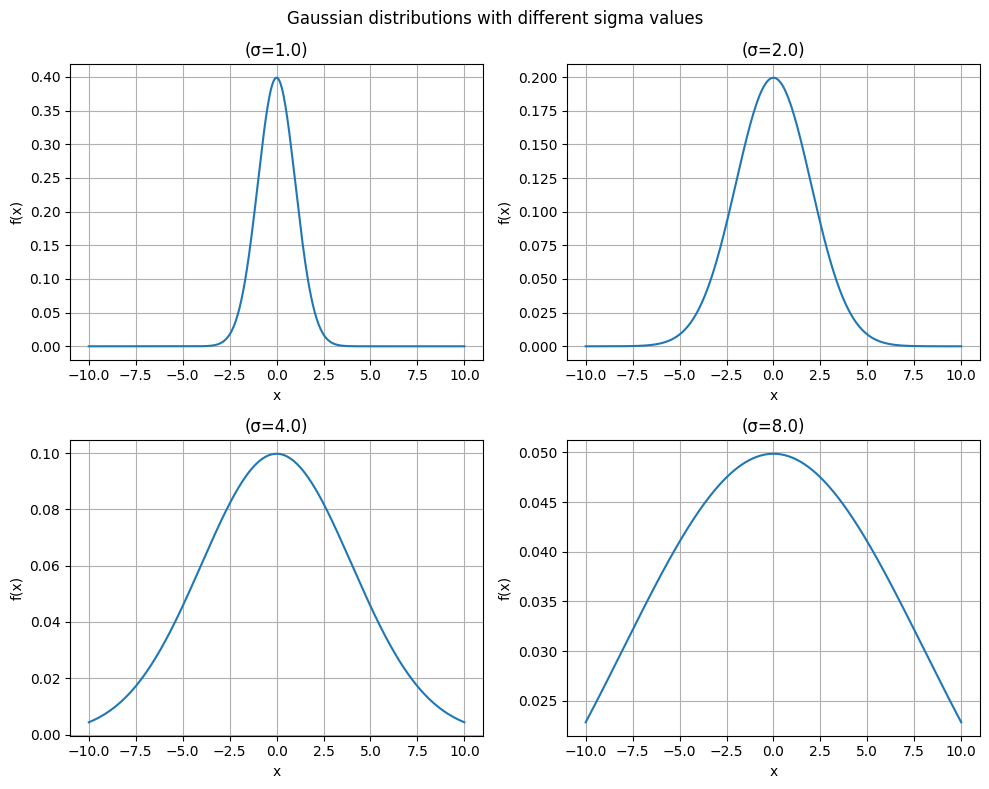

In [ ]:
## Plotting the Gaussian itself - illustrate sigma variation

#  the function
def gaussian_1d(x, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-x**2 / (2 * sigma**2))

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

# for each sigma 
for ax, s in zip(axs, sigma):
    x = np.linspace(-10, 10, 400)
    y = gaussian_1d(x, s)
    ax.plot(x, y, label=f'sigma = {s}')
    ax.set_title(f'(σ={s})')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid(True)

fig.suptitle('Gaussian distributions with different sigma values')
plt.tight_layout()
plt.show()